# Question 5  

The effect of five different ingredients $(A,B,C,D,E)$ on reaction time of a chemical process is being studied. Each batch of new material is only large enough to permit five runs to be made. Furthermore, each run requires approximately 1 1/2 hours, so only five runs can be made in one day. The experimenter decides to run the experiment as a Latin square so that day and batch effects can be systematically controlled. She obtains the data the follow. Analyze the data from this experiment (use $\alpha = 0.05$) and draw conclusions.

We set up the latin square design like so:

In [51]:
day <- factor(rep(1:5, each = 5))
batch <- factor(rep(1:5, times = 5))
ingredient <- factor(c(
    "A", "C", "B", "D", "E",
    "B", "E", "A", "C", "D",
    "D", "A", "C", "E", "B",
    "C", "D", "E", "B", "A",
    "E", "B", "D", "A", "C")
)
effect <- c(
    08, 11, 04, 06, 04,
    07, 02, 09, 08, 02,
    01, 07, 10, 06, 03,
    07, 03, 01, 06, 08,
    03, 08, 05, 10, 08
)
data <- data.frame(day, batch, ingredient, effect)

Conducting an ANOVA on the model we have

In [52]:
# "package 'rlat' is not available for this version of R" :(
model <- aov(effect ~ day + batch + ingredient, data = data)
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
day          4  12.24    3.06   0.979 0.455014    
batch        4  15.44    3.86   1.235 0.347618    
ingredient   4 141.44   35.36  11.309 0.000488 ***
Residuals   12  37.52    3.13                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value associated with with $ingredient$ is much lower than $\alpha = 0.05$, suggesting there is strong evidence that the ingredients have a significant effect on the reaction time of the chemical process. We can explore this further with a tukey test.

In [53]:
tukey <- TukeyHSD(x = analysis, conf.level = 0.95)
tukey$ingredient

,diff,lwr,upr,p adj
B-A,-2.8,-6.3646078,0.7646078,0.153943335
C-A,0.4,-3.1646078,3.9646078,0.996001220
D-A,-5.0,-8.5646078,-1.4353922,0.005586216
E-A,-5.2,-8.7646078,-1.6353922,0.004143094
C-B,3.2,-0.3646078,6.7646078,0.086435305
D-B,-2.2,-5.7646078,1.3646078,0.336581142
E-B,-2.4,-5.9646078,1.1646078,0.263155088
D-C,-5.4,-8.9646078,-1.8353922,0.003082228
E-C,-5.6,-9.1646078,-2.0353922,0.002300665
E-D,-0.2,-3.7646078,3.3646078,0.999734935


Setting $\alpha = 0.05$, there is statistically significant evidence that there are differences between:  

D-A,  
E-A,  
D-C,  
E-C  

We can confirm out model by testing normality and constant variance.


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.96606, p-value = 0.5476


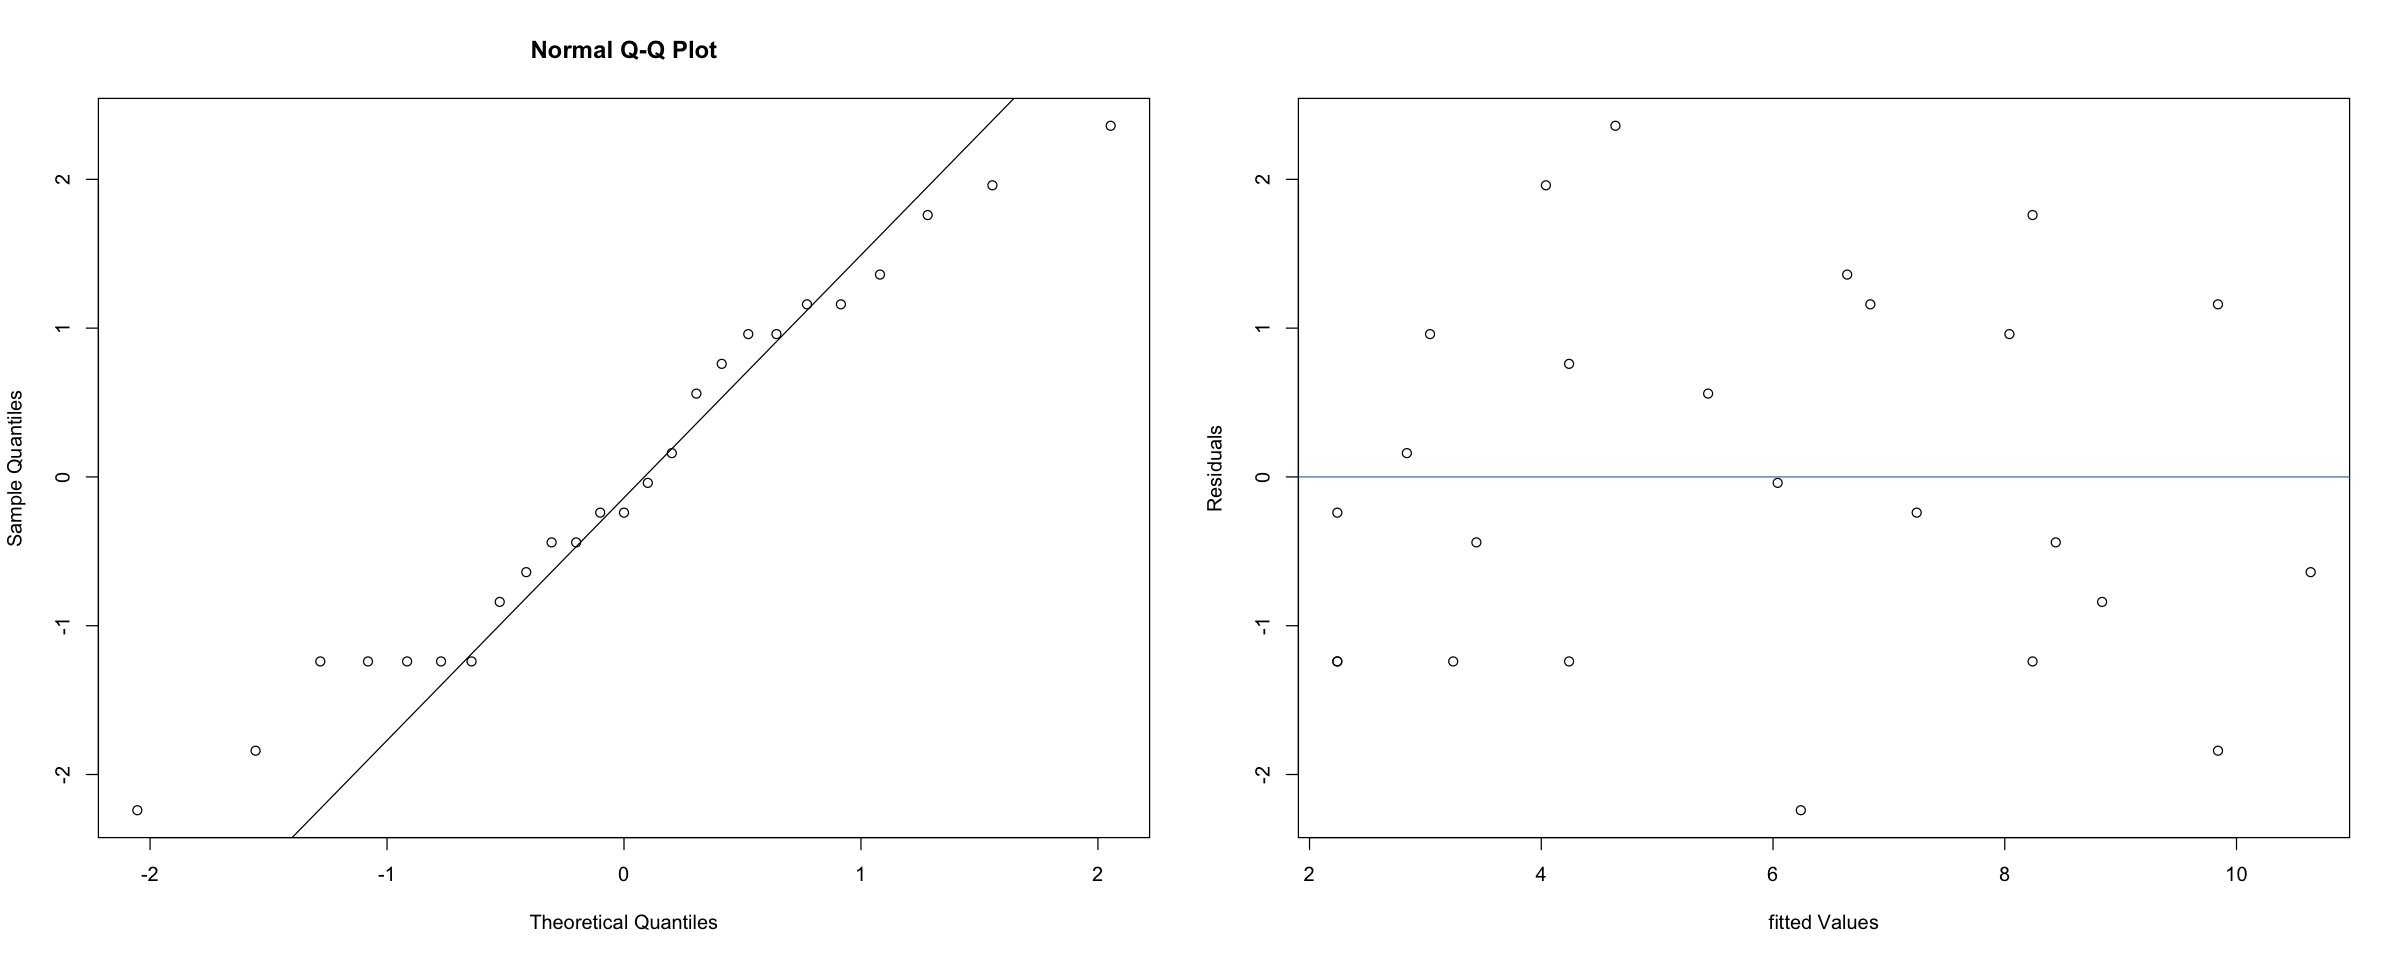

In [54]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))

# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue") 

# Shapiro-Wilk
shapiro.test(residuals(model))

The QQplot shows the residuals are roughly normal and the variances looks constant throughout. There is no reason to believe the model assumptions are violated. The Shapiro-Wilk test confirms normallity of residuals.